In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# All the datasets 

# box_office_mojo = pd.read_csv("./data/bom.movie_gross.csv")

# imdb_name = pd.read_csv("./data/name.basics.csv")
# imdb_title = pd.read_csv("./data/title.basics.csv")
# imdb_crew = pd.read_csv("./data/title.crew.csv") 
# imdb_principals = pd.read_csv("./data/title.principals.csv")
# imdb_ratings = pd.read_csv("./data/title.ratings.csv")
# imdb_akas = pd.read_csv("./data/title.akas.csv")

# rt_info = pd.read_csv("./data/rt.movie_info.tsv", sep = "\t")
# rt_reviews = pd.read_csv("./data/rt.reviews.tsv", sep = "\t", encoding='windows-1252')

# the_movie_db = pd.read_csv("./data/tmdb.movies.csv")

# movie_budgets = pd.read_csv("tngross.csv")

In [3]:
# title_and_ratings = imdb_title.merge(imdb_ratings, on="tconst")
# title_and_ratings = title_and_ratings.rename(columns={"primary_title":"movie"})
# imdb_crew = imdb_crew.rename(columns={"directors":"nconst"})
# names_of_director = imdb_crew.merge(imdb_name, on="nconst")
# imdb_df = title_and_ratings.merge(names_of_director, on="tconst")
# df = imdb_df.merge(movie_budgets, on="movie")

In [4]:
# df = df.drop([#'tconst', 
#          'original_title', 
#          'start_year', 
#          'nconst', 
#          'writers', 
#          'birth_year', 
#          'death_year', 
#          'primary_profession', 
#          'known_for_titles',
#          'Unnamed: 0'], axis=1)

In [5]:
# New datasets
df1 = pd.read_csv("data/tngross.csv")
df2 = pd.read_csv("data/tnproduction.csv")

In [6]:
df = df1.merge(df2, on="Unnamed: 0")

In [7]:
len(df)

6100

In [8]:
df.head(2)

,Unnamed: 0,release_date,movie,production_budget,domestic_gross,worldwide_gross,runtime_minutes,genres,production_company,production_country
0,0,"Apr 23, 2019",Avengers: Endgame,"$400,000,000","$858,373,000","$2,797,800,564",181 minutes,Action,Marvel Studios,United States
1,1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$379,000,000","$241,071,802","$1,045,713,802",136 minutes,Adventure,Walt Disney Pictures,United States


In [9]:
df = df.drop("Unnamed: 0", axis=1)

### Clean up columns
1. release_date: change format to datetime
2. movie: find duplicates, but check if totally the same, or other features are different
3. production_budget: change to int
4. domestic_gross: change to int
5. worldwide_gross: change to int
6. runtime_minutes: drop minutes, change to int
7. genres:
8. production_company: change to list and break down per company
9. production_country:

In [10]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce', format='%b %d, %Y')

In [11]:
def dollar_to_int(column):
    return column.str.replace('$', '').str.replace(',', '').map(int)

In [12]:
df[['production_budget', 'domestic_gross', 'worldwide_gross']] = df[['production_budget', 'domestic_gross', 'worldwide_gross']].apply(dollar_to_int)

In [13]:
df['runtime_minutes'] = df['runtime_minutes'].map(lambda x: x.split(' ')[0].strip(' '))

In [14]:
# df.loc[df['runtime_minutes']=='None']

### Remove missing values of worldwide_gross

In [15]:
df = df[~(df['worldwide_gross']==0)]

### Create new columns
10. total_profit
11. profit_budget_ratio
12. profit_budget_perc
13. day
14. month
15. year

In [16]:
df['total_profit'] = df['worldwide_gross'] - df['production_budget']

In [17]:
df['profit_to_budget'] = df['worldwide_gross'] / df['production_budget']

In [18]:
df['profit_to_budget_perc'] = df['profit_to_budget'] * 100

In [19]:
df['day'] = df['release_date'].dt.day_name()

In [20]:
df['month'] = pd.DatetimeIndex(df['release_date']).month

In [21]:
df['year'] = pd.DatetimeIndex(df['release_date']).year

In [22]:
df.head(2)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,runtime_minutes,genres,production_company,production_country,total_profit,profit_to_budget,profit_to_budget_perc,day,month,year
0,2019-04-23,Avengers: Endgame,400000000,858373000,2797800564,181,Action,Marvel Studios,United States,2397800564,6.994501,699.450141,Tuesday,4.0,2019.0
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,379000000,241071802,1045713802,136,Adventure,Walt Disney Pictures,United States,666713802,2.759139,275.913932,Friday,5.0,2011.0


In [23]:
df.describe()

,production_budget,domestic_gross,worldwide_gross,total_profit,profit_to_budget,profit_to_budget_perc,month,year
count,5.747000e+03,5.747000e+03,5.747000e+03,5.747000e+03,5747.000000,5747.000000,5686.000000,5686.000000
mean,3.352283e+07,4.444587e+07,9.840660e+07,6.488377e+07,4.400831,440.083145,6.981006,2004.447239
std,4.262659e+07,7.057323e+07,1.842933e+08,1.554306e+08,16.162276,1616.227637,3.402052,12.712653
min,1.000000e+05,0.000000e+00,1.700000e+01,-1.580898e+08,0.000002,0.000227,1.000000,1915.000000
25%,6.400000e+06,3.074324e+06,7.113001e+06,-1.987679e+06,0.692488,69.248764,4.000000,2000.000000
50%,1.900000e+07,1.987057e+07,3.301380e+07,1.197129e+07,1.863649,186.364938,7.000000,2007.000000
75%,4.200000e+07,5.500460e+07,1.038857e+08,6.708668e+07,3.926888,392.688799,10.000000,2013.000000
max,4.000000e+08,9.366622e+08,2.845900e+09,2.608900e+09,498.750000,49875.000000,12.000000,2021.000000


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5747 entries, 0 to 6091
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   release_date           5686 non-null   datetime64[ns]
 1   movie                  5747 non-null   object        
 2   production_budget      5747 non-null   int64         
 3   domestic_gross         5747 non-null   int64         
 4   worldwide_gross        5747 non-null   int64         
 5   runtime_minutes        5747 non-null   object        
 6   genres                 5747 non-null   object        
 7   production_company     5747 non-null   object        
 8   production_country     5747 non-null   object        
 9   total_profit           5747 non-null   int64         
 10  profit_to_budget       5747 non-null   float64       
 11  profit_to_budget_perc  5747 non-null   float64       
 12  day                    5686 non-null   object        
 13  mon

In [25]:
df['release_date'].isnull().value_counts()

False    5686
True       61
Name: release_date, dtype: int64

In [26]:
dates_df = df[~df['release_date'].isna()]

In [27]:
dates_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5686 entries, 0 to 6091
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   release_date           5686 non-null   datetime64[ns]
 1   movie                  5686 non-null   object        
 2   production_budget      5686 non-null   int64         
 3   domestic_gross         5686 non-null   int64         
 4   worldwide_gross        5686 non-null   int64         
 5   runtime_minutes        5686 non-null   object        
 6   genres                 5686 non-null   object        
 7   production_company     5686 non-null   object        
 8   production_country     5686 non-null   object        
 9   total_profit           5686 non-null   int64         
 10  profit_to_budget       5686 non-null   float64       
 11  profit_to_budget_perc  5686 non-null   float64       
 12  day                    5686 non-null   object        
 13  mon

### Analysis of release_date: day, month, year

In [28]:
dates_df['day'].value_counts(normalize=True)*100

Friday       72.071755
Wednesday    14.790714
Thursday      8.723180
Tuesday       2.374253
Monday        0.773830
Sunday        0.668308
Saturday      0.597960
Name: day, dtype: float64

In [29]:
# day_numbers = {
#     "Monday" : 0,
#     "Tuesday" : 1,
#     "Wednesday" : 2,
#     "Thursday" : 3,
#     "Friday" : 4,
#     "Saturday" : 5,
#     "Sunday" : 6
# }

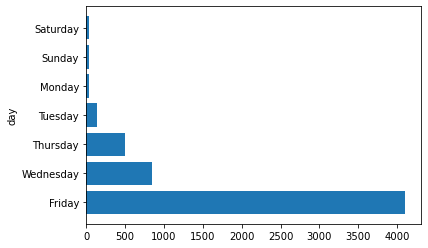

In [30]:
fig, ax = plt.subplots()

day_values = dates_df['day'].value_counts()

ax.barh(
    y=day_values.index,
    width=day_values.values
)
ax.set_ylabel('day');

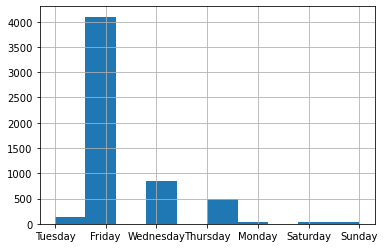

In [31]:
dates_df['day'].hist();

In [32]:
dates_df['month'].value_counts(normalize=True)*100

10.0    10.499472
12.0    10.376363
8.0      9.022160
11.0     8.916637
9.0      8.881463
6.0      8.582483
4.0      7.966936
7.0      7.949349
3.0      7.861414
5.0      7.210693
2.0      7.017235
1.0      5.715793
Name: month, dtype: float64

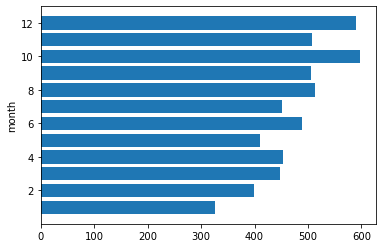

In [33]:
fig, ax = plt.subplots()

month_values = dates_df['month'].value_counts()

ax.barh(
    y=month_values.index,
    width=month_values.values
)
ax.set_ylabel('month');

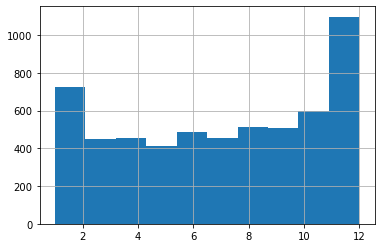

In [34]:
dates_df['month'].hist();

In [35]:
dates_df['year'].value_counts(normalize=True)*100

2015.0    4.449525
2010.0    4.396764
2006.0    4.344003
2008.0    4.256068
2011.0    4.185719
            ...   
1931.0    0.017587
1916.0    0.017587
1937.0    0.017587
1920.0    0.017587
1934.0    0.017587
Name: year, Length: 94, dtype: float64

In [1]:
dates_df['year'].unique()

NameError: name 'dates_df' is not defined

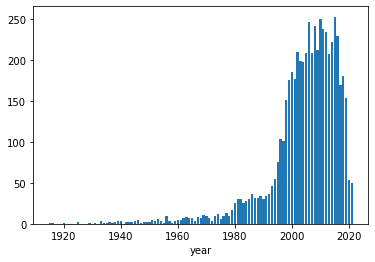

In [36]:
fig, ax = plt.subplots()

year_values = dates_df['year'].value_counts()

ax.bar(
    x=year_values.index,
    height=year_values.values
)
ax.set_xlabel('year');

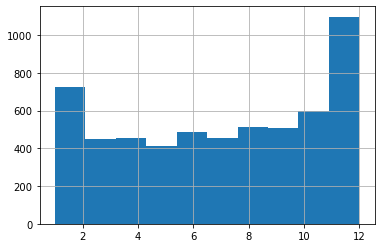

In [37]:
dates_df['month'].hist();

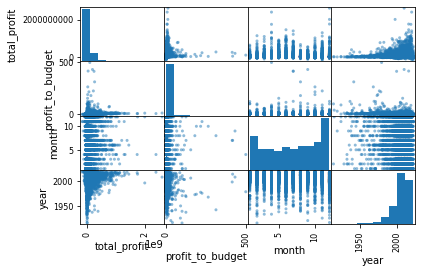

In [38]:
pd.plotting.scatter_matrix(dates_df[['total_profit', 'profit_to_budget', 'month', 'year']]);

#### Add analysis for quarterly release

In [55]:
dates_df['quarter'] = dates_df['release_date'].dt.quarter

<ipython-input-55-08f4435b78d6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dates_df['quarter'] = dates_df['release_date'].dt.quarter


In [57]:
dates_df['quarter'].value_counts(normalize=True)*100

4    29.792473
3    25.852972
2    23.760113
1    20.594442
Name: quarter, dtype: float64

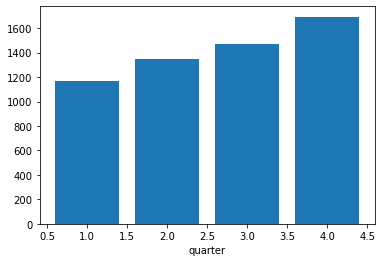

In [59]:
fig, ax = plt.subplots()

quarter_values = dates_df['quarter'].value_counts()

ax.bar(
    x=quarter_values.index,
    height=quarter_values.values
)
ax.set_xlabel('quarter');

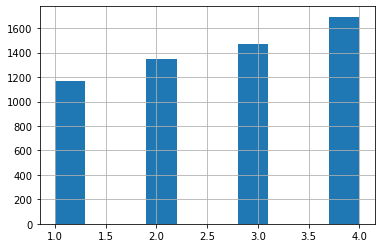

In [60]:
dates_df['quarter'].hist();

### Relationship between release_date and total_profit

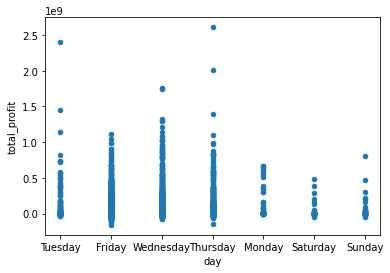

In [40]:
dates_df.plot('day', 'total_profit', kind='scatter');

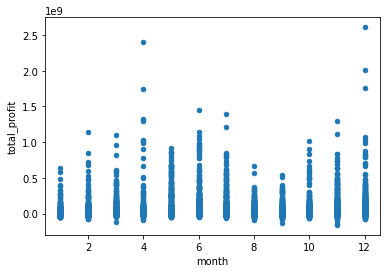

In [41]:
dates_df.plot('month', 'total_profit', kind='scatter');

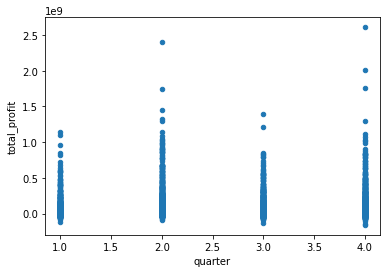

In [61]:
dates_df.plot('quarter', 'total_profit', kind='scatter');

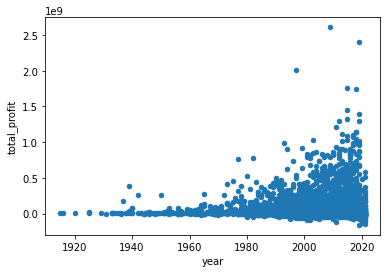

In [42]:
dates_df.plot('year', 'total_profit', kind='scatter');

### Relationship between release_date and profit_to_budget

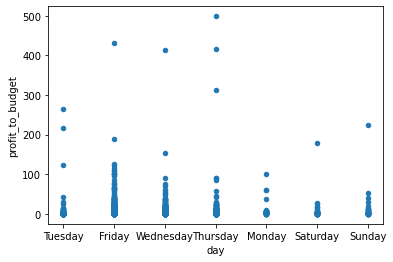

In [43]:
dates_df.plot('day', 'profit_to_budget', kind='scatter');

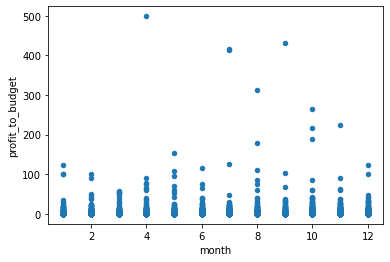

In [44]:
dates_df.plot('month', 'profit_to_budget', kind='scatter');

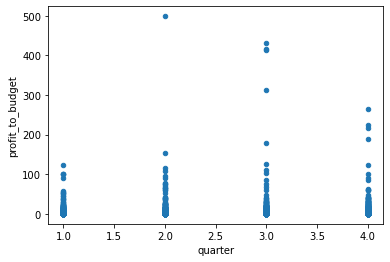

In [62]:
dates_df.plot('quarter', 'profit_to_budget', kind='scatter');

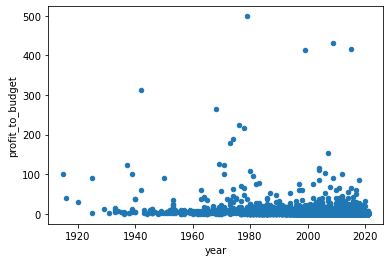

In [45]:
dates_df.plot('year', 'profit_to_budget', kind='scatter');

#### Correlation between profit_to_budget and columns

In [67]:
dates_df.dtypes

release_date             datetime64[ns]
movie                            object
production_budget                 int64
domestic_gross                    int64
worldwide_gross                   int64
runtime_minutes                  object
genres                           object
production_company               object
production_country               object
total_profit                      int64
profit_to_budget                float64
profit_to_budget_perc           float64
day                              object
month                           float64
year                            float64
quarter                           int64
dtype: object

In [47]:
dates_genre_df = dates_df[dates_df['runtime_minutes'] != 'None']

In [48]:
dates_genre_df['runtime_minutes'] = dates_genre_df['runtime_minutes'].astype(int)

<ipython-input-48-993ec27f2447>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dates_genre_df['runtime_minutes'] = dates_genre_df['runtime_minutes'].astype(int)


In [63]:
corr_dict = {}
for col in dates_genre_df.columns:
    if col == 'profit_to_budget' or col == 'profit_to_budget_perc' or col == 'release_date':
        continue
    if dates_genre_df[col].dtype != 'object':
        col_corr = df['profit_to_budget'].corr(dates_genre_df[col], method='pearson')
        #np.corrcoef(df['profit_to_budget'], df[col])[0][1]
        corr_dict[col] = col_corr
        
max_corr = max(corr_dict, key=corr_dict.get)

In [64]:
max_corr

'total_profit'

In [65]:
min_corr = min(corr_dict, key=corr_dict.get)
min_corr

'year'

In [68]:
corr_dict

{'production_budget': -0.08435724327369255,
 'domestic_gross': 0.10430943857375854,
 'worldwide_gross': 0.08305805926211017,
 'runtime_minutes': -0.029490266446380236,
 'total_profit': 0.12075882773772711,
 'month': 0.009742157236737846,
 'year': -0.17078752415780285}

### Data Analysis

In [ ]:
dates_df['day'] = dates_df['release_date'].dt.dayofweek
dates_df['month'] = pd.DatetimeIndex(dates_df['release_date']).month

In [ ]:
dates_df['category'] = 'Profitable'
dates_df.loc[dates_df['earnings_ratio'] < 1, 'category'] = 'Non-Profitable'

In [ ]:
ax = sns.catplot(
    data=dates_df, kind="bar",
    x="day", y="earnings_ratio", hue="category",
    ci=None, height=10,
    palette=sns.color_palette(['#7FBC00', '#F34F1C'])
)

ax.set_axis_labels("Day", "Earnings Ratio")
ax.legend.set_title("Earnings Ratio per Day")

plt.xticks(range(7), ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.show()

## >>> Use single bar graph below if grouped bar above is not good

In [ ]:
gains_dates_df = dates_df.loc[dates_df['earnings_ratio'] >= 1]

In [ ]:
# loss_dates_df = dates_df.loc[dates_df['earnings_ratio'] < 1]
# mean_day_df = dates_df.groupby("day", as_index=False).mean()

# plt.figure(figsize=(14, 10))

# sns.barplot(
#     x="day", 
#     y="earnings_ratio",
#     data=dates_df, # OR gains_dates_df, OR loss_dates_df, OR mean_day_df
#     color='#01A6F0',
#     ci=None)

# plt.xlabel('Days of the week')
# plt.xticks(range(7), ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
# plt.ylabel('Earnings Ratio')
# plt.title('Earnings Ratio per Day')
# plt.show()

In [ ]:
horror_dates_df = gains_dates_df.loc[gains_dates_df['genres'] == 'Horror']

In [ ]:
fig, ax = plt.subplots(figsize=(12, 10))

sns.countplot(
    x="month", 
    color="#F34F1C",
    data = horror_dates_df,)
plt.title("Horror Movies per Month")
plt.xlabel("Month")
plt.ylabel("Horror Movie Count")

plt.xticks(range(12), ['Jan','Feb','Mar','Apr','May','Jun','July','Aug','Sep','Oct','Nov','Dec'])
plt.show()

In [ ]:
# ax = sns.catplot(
#     data=horror_dates_df, kind="bar",
#     x="month", y="earnings_ratio", hue="category",
#     ci=None, height=10,
#     palette=sns.color_palette(['#7FBC00', '#F34F1C'])
# )

# ax.set_axis_labels("Month", "Horror Movie Count")
# ax.legend.set_title("Horror Movies per Month")

# plt.xticks(range(12), ['Jan','Feb','Mar','Apr','May','Jun','July','Aug','Sep','Oct','Nov','Dec'])
# plt.show()

In [ ]:
# fig, ax = plt.subplots(figsize=(12, 5))

# sns.barplot(
#     x="month", 
#     y="earnings_ratio",
#     color="#01A6F0",
#     data = gains_dates_df,
#     ci=None)
# plt.title("Earnings Ratio per Month")
# plt.xlabel("Month")
# plt.ylabel("Earnings Ratio")

# plt.xticks(range(12), ['Jan','Feb','Mar','Apr','May','Jun','July','Aug','Sep','Oct','Nov','Dec'])
# plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(12, 10))

sns.countplot(
    x="month", 
    color="#F34F1C",
    data = horror_dates_df,)
plt.title("Horror Movies per Month")
plt.xlabel("Month")
plt.ylabel("Horror Movie Count")

plt.xticks(range(12), ['Jan','Feb','Mar','Apr','May','Jun','July','Aug','Sep','Oct','Nov','Dec'])
plt.show()



In [ ]:
horror_loss_df = loss_dates_df[loss_dates_df['genres'] == 'Horror']

In [ ]:
fig, ax = plt.subplots(figsize=(12,7))

sns.countplot(
    x="month", 
    color="#F34F1C",
    data = horror_loss_df,)
plt.title("Non-Profitable Horror Movies per Month")
plt.xlabel("Month")
plt.ylabel("Horror Movie Count")

plt.xticks(range(12), ['Jan','Feb','Mar','Apr','May','Jun','July','Aug','Sep','Oct','Nov','Dec'])
plt.show()